In [1]:
# Import necessary modules
import numpy as np
import pandas as pd

# Set pandas display options to view all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 1000)

In [2]:
# Set file path and files for reference
file_path = '/Users/nickburkhalter/Desktop/mortality/'
fifteen = '2015_data.csv'

In [3]:
# Since the datasets are so large, it will be best to stick to just 1 year of data
# We will do all our computations using the most recent dataset available, 2015

# Create 2015 dataframe
df = pd.read_csv(file_path + fifteen)
print(df.memory_usage(index=True).sum())
print(df.shape)
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1674410048
(2718198, 77)


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,22,10,NaN,1,M,1,2015,U,7.0,B,N,NaN,NaN,I500,230,67,NaN,22,2,11I500,61L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,I500,L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,20,9,NaN,1,M,2,2015,U,7.0,C,N,NaN,NaN,C349,93,27,NaN,8,8,11I469,21R042,31C349,41J189,42J90,61J449,62I251,63F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,C349,F179,I251,I469,J440,J90,R042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,24,11,NaN,4,W,6,2015,U,7.0,C,N,NaN,NaN,G309,189,52,NaN,17,1,11G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,14,6,NaN,4,S,5,2015,N,3.0,B,Y,9.0,9.0,X91,434,129,NaN,41,6,11T71,12X91,21T71,61T149,62S223,63S299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,X91,S223,S299,T149,T71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,23,11,NaN,6,W,5,2015,U,7.0,C,N,NaN,9.0,I250,214,62,NaN,21,3,11I250,21S720,61X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I250,S720,X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [4]:
# Select sample from data to help with memory issues
df = df.sample(700000, random_state=42)
print(df.shape)
print(df.memory_usage(index=True).sum())
df.head()

(700000, 77)
436800000


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
130884,1,NaN,3.0,1,10,F,1,75,NaN,41,21,10,NaN,7,W,6,2015,U,7.0,B,N,NaN,NaN,J449,267,86,NaN,28,3,11J969,21J449,61I429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J449,I429,J969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1823396,1,NaN,6.0,1,4,M,1,63,NaN,38,18,8,NaN,2,M,2,2015,U,7.0,C,Y,NaN,NaN,I119,207,56,NaN,20,3,11I119,21I10,61F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I119,F179,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
156039,2,NaN,4.0,1,1,F,1,87,NaN,43,23,11,NaN,6,M,7,2015,U,NaN,C,N,NaN,NaN,M609,315,111,NaN,37,5,11I469,21R53,31M609,61D649,62E876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,M609,D649,E876,I469,R53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1915133,2,NaN,4.0,1,3,M,1,78,NaN,41,21,10,NaN,1,M,3,2015,U,7.0,C,N,NaN,NaN,C349,93,27,NaN,8,4,11I741,21C349,22I250,61I739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,C349,I250,I739,I741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
189583,1,NaN,3.0,1,3,F,1,85,NaN,43,23,11,NaN,4,W,5,2015,U,NaN,C,N,NaN,NaN,J111,253,77,NaN,27,3,11R688,21J111,61G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J111,G309,R688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [5]:
# Get data from JSON file about featire codes
import json

file_path = '/Users/nickburkhalter/Desktop/mortality/'
codes = '2015_codes.csv'

with open(file_path + codes) as json_file:
    data = json.load(json_file)
data

{'resident_status': {'1': 'RESIDENTS',
  '2': 'INTRASTATE NONRESIDENTS',
  '3': 'INTERSTATE NONRESIDENTS',
  '4': 'FOREIGN RESIDENTS'},
 'education_1989_revision': {'00': 'No formal education',
  '01-08': 'Years of elementary school',
  '09': '1 year of high school',
  '10': '2 years of high school',
  '11': '3 years of high school',
  '12': '4 years of high school',
  '13': '1 year of college',
  '14': '2 years of college',
  '15': '3 years of college',
  '16': '4 years of college',
  '17': '5 or more years of college',
  '99': 'Not stated'},
 'education_2003_revision': {'1': '8th grade or less',
  '2': '9 - 12th grade, no diploma',
  '3': 'high school graduate or GED completed',
  '4': 'some college credit, but no degree',
  '5': 'Associate degree',
  '6': 'Bachelor’s degree',
  '7': 'Master’s degree',
  '8': 'Doctorate or professional degree',
  '9': 'Unknown'},
 'education_reporting_flag': {'0': '1989 revision of education item on certificate',
  '1': '2003 revision of education it

In [6]:
# Replace numeric values in df with categorical annotations from JSON dict
for key in data.keys():
    df[key] = df[key].astype(str).replace(data[key])

In [7]:
# We still need to do a bit of cleaning
# For example, a lot of the numbered columns should have been converted to strings
# but because the data dict has leading 0's, these values did not get converted
# We will start with the education_1989_revision and education_2003_revision columns

# Strip the .0 from the numeric values
df['education_1989_revision'] = df['education_1989_revision'].str.strip('.0')

In [8]:
df['education_1989_revision'] = df['education_1989_revision'].replace(data['education_1989_revision'])

In [9]:
# Map the remaining numbers to a dictionary
edu_dict = {
    '1': '1 year of elementary school',
    '2': '2 years of elementary school',
    '3': '3 years of elementary school',
    '4': '4 years of elementary school',
    '5': '5 years of elementary school',
    '6': '6 years of elementary school',
    '7': '7 years of elementary school',
    '8': '8 years of elementary school',
    '9': '1 year of high school'
}

df['education_1989_revision'] = df['education_1989_revision'].replace(edu_dict)

In [10]:
# Do the same with education_2003_revision
# Strip the .0 from the numeric values
df['education_2003_revision'] = df['education_2003_revision'].str.strip('.0')
df['education_2003_revision'] = df['education_2003_revision'].replace(data['education_2003_revision'])

In [11]:
# People that were coded with the 1989 education revision were left out of the 2003 revision
# and vice-versa
# Let's engineer a new feature that shows the highest level of education the person received, certs or not

df['education_level'] = df['education_2003_revision']
df.head()

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level
130884,RESIDENTS,nan,high school graduate or GED completed,2003 revision of education item on certificate,October,Female,Years,75,nan,75 - 79 years,75 - 79 years,75 - 84 years,nan,Other,Widowed,Friday,2015,Unknown,7.0,Burial,No,nan,nan,J449,Other chronic obstructive pulmonary disease (J44),86,nan,28,3,11J969,21J449,61I429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J449,I429,J969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,high school graduate or GED completed
1823396,RESIDENTS,nan,Bachelor’s degree,2003 revision of education item on certificate,4,Male,Years,63,nan,60 - 64 years,60 - 64 years,8,nan,"Hospital, Clinic or Medical Center",Married,Monday,2015,Unknown,7.0,Cremation,Yes,nan,nan,I119,Hypertensive heart disease (I11),56,nan,20,3,11I119,21I10,61F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I119,F179,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,Bachelor’s degree
156039,INTRASTATE NONRESIDENTS,nan,"some college credit, but no degree",2003 revision of education item on certificate,1,Female,Years,87,nan,85 - 89 years,85 - 89 years,85 years and over,nan,Nursing home/long term care,Married,Saturday,2015,Unknown,nan,Cremation,No,nan,nan,M609,Soft tissue disorders (M60-M79),"All other diseases (Residual) (D65-E07,E15-E34...",nan,37,5,11I469,21R53,31M609,61D649,62E876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,M609,D649,E876,I469,R53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,"some college credit, but no degree"
1915133,INTRASTATE NONRESIDENTS,nan,"some college credit, but no degree",2003 revision of education item on certificate,3,Male,Years,78,nan,75 - 79 years,75 - 79 years,75 - 84 years,nan,"Hospital, clinic or Medical Center",Married,Tuesday,2015,Unknown,7.0,Cremation,No,nan,nan,C349,93,27,nan,8,4,11I741,21C349,22I250,61I739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,C349,I250,I739,I741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,"some college credit, but no degree"
189583,RESIDENTS,nan,high school graduate or GED completed,2003 revision of education item on certificate,3,Female,Years,85,nan,85 - 89 years,85 - 89 years,85 years and over,nan,Decedent’s home,Widowed,Thursd

In [12]:
# Convert string 'nan's to np.nan
df['education_level'] = df['education_level'].replace('nan', np.nan)

In [13]:
# Fillna with 1989 education revision
df['education_level'] = df['education_level'].fillna(df['education_1989_revision'])

In [14]:
# Create new dict to apply to education_level column
education_level_dict = {
    'high school graduate or GED completed': 'high school',
    'some college credit, but no degree': 'college',
    '8th grade or less': '8th grade or less', 
    '9 - 12th grade, no diploma': 'high school',
    "Bachelor's degree": 'college',
    'Associate degree': 'college',
    'Unknown': 'Unknown',
    "Master's degree": 'graduate',
    'Doctorate or professional degree': 'postgraduate',
    '4 years of high school': 'high school',
    '2 years of college': 'college',
    '4 years of college': 'college',
    '8 years of elementary school': '8th grade or less', 
    '1 year of elementary school': '8th grade or less',
    '3 years of high school': 'high school', 
    '5 or more years of college': 'college', 
    '1 year of high school': 'high school',
    '1 year of college': 'college',
    '6 years of elementary school': '8th grade or less',
    '7 years of elementary school': '8th grade or less',
    '3 years of college': 'college',
    'Not stated': 'Unknown',
    '3 years of elementary school': '8th grade or less',
    '5 years of elementary school': '8th grade or less',
    '4 years of elementary school': '8th grade or less',
    '2 years of elementary school': '8th grade or less',
}

df['education_level'] = df['education_level'].replace(education_level_dict)

In [15]:
# Bachelor's and Master's degrees gave us some issues (funky apostophe)
# Fix them here
# We also have some blank entries. Upon further review, these entries are either non-citizens or infants
# We will leave them as-is
df['education_level'] = df['education_level'].replace(["Bachelor’s degree", "Master’s degree"], ['college', 'graduate'])
df['education_level'].value_counts()

high school          359435
college              193161
8th grade or less     78326
Unknown               30888
graduate              26634
postgraduate          11294
                        262
Name: education_level, dtype: int64

In [16]:
# we can go ahead and drop the included education columns, as well as the current_year column
df = df.drop(columns=['education_1989_revision', 'education_2003_revision', 
                     'education_reporting_flag', 'current_data_year'])
print(df.shape)

(700000, 74)


In [17]:
# Reformat age_recode_27 column to get the correct entries for each sample
age_recode_12_dict = {
    '1': 'Under 1 year (includes not stated infant ages)',
    '2': '1 - 4 years',
    '3': '5 - 14 years',
    '4': '15 - 24 years',
    '5': '25 - 34 years',
    '6': '35 - 44 years',
    '7': '45 - 54 years',
    '8': '55 - 64 years',
    '9': '65 - 74 years',
    '10': '75 - 84 years',
    '11': '85 years and over',
    '12': 'Age not stated'
}

# Create new age_bin feature
df['age_bin'] = df['age_recode_12']

# Replace numeric values with the data dict
df['age_bin'] = df['age_bin'].replace(age_recode_12_dict)

In [18]:
# Drop appropriate age columns
df = df.drop(columns=['age_substitution_flag', 'age_recode_52', 
                     'age_recode_27', 'age_recode_12'])
print(df.shape)

(700000, 71)


In [19]:
# Correct month of death column
mod_dict = {
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'}

df['month_of_death'] = df['month_of_death'].replace(mod_dict)

In [20]:
# Correct infant_age_recode_22 column
infant_dict = {
    'Blank': 'Age 1 year and over or not stated',
    '1': 'Under 1 hour (includes not stated hours and minutes)',
    '2': '1 - 23 hours',
    '3': '1 day (includes not stated days)',
    '4': '2 days',
    '5': '3 days',
    '6': '4 days',
    '7': '5 days',
    '8': '6 days',
    '9': '7-13 days (includes not stated weeks)',
    '10': '14 - 20 days',
    '11': '21 - 27 days',
    '12': '1 month (includes not stated months)',
    '13': '2 months',
    '14': '3 months',
    '15': '4 months',
    '16': '5 months',
    '17': '6 months',
    '18': '7 months',
    '19': '8 months',
    '20': '9 months',
    '21': '10 months',
    '22': '11 months'}

# Strip trailing .0
df['infant_age_recode_22'] = df['infant_age_recode_22'].str.strip('.0')
# Apply new dict values
df['infant_age_recode_22'] = df['infant_age_recode_22'].replace(infant_dict)

In [21]:
# Fix manner_of_death column
death_note = {
    '1': 'Accident',
    '2': 'Suicide',
    '3': 'Homicide',
    '4': 'Pending investigation',
    '5': 'Could not determine',
    '6': 'Self-Inflicted',
    '7': 'Natural',
    'nan': 'Not specified'}

# Strip trailing .0
df['manner_of_death'] = df['manner_of_death'].str.strip('.0')
# Apply new dict values
df['manner_of_death'] = df['manner_of_death'].replace(death_note)

In [22]:
# Drop needless columns (columns whose values contain only NaN values)
df = df.drop(columns=['entity_condition_15', 'entity_condition_16', 
                      'entity_condition_17', 'entity_condition_18', 
                      'entity_condition_19', 'entity_condition_20', 
                      'record_condition_15', 'record_condition_16', 
                      'record_condition_17', 'record_condition_18', 
                      'record_condition_19', 'record_condition_20'])
print(df.shape)

(700000, 59)


In [23]:
# Fix activity_code column
# Strip trailing .0
df['activity_code'] = df['activity_code'].str.strip('.0')
# Replace nan with Blank
df['activity_code'] = df['activity_code'].replace('nan', 'Blank')
# Apply new dict values
df['activity_code'] = df['activity_code'].replace(data['activity_code'])

In [24]:
# Fix 39_cause_recode column
cause_dict = {
    '1': 'Tuberculosis (A16-A19)',
    '2': 'Syphilis (A50-A53)',
    '3': 'Human immunodeficiency virus (HIV) disease (B20-B24)',
    '4': 'Malignant neoplasms (C00-C97)',
    '5': 'Malignant neoplasm of stomach (C16)',
    '6': 'Malignant neoplasms of colon, rectum and anus (C18-C21)',
    '7': 'Malignant neoplasm of pancreas (C25)',
    '8': 'Malignant neoplasms of trachea, bronchus and lung (C33-C34)',
    '9': 'Malignant neoplasm of breast (C50)',
    '10': 'Malignant neoplasms of cervix uteri, corpus uteri and ovary (C53-C56)',
    '11': 'Malignant neoplasm of prostate (C61)',
    '12': 'Malignant neoplasms of urinary tract (C64-C68)',
    '13': "Non-Hodgkin's lymphoma (C82-C85)",
    '14': 'Leukemia (C91-C95)',
    '15': 'Other malignant neoplasms (C00-C15,C17,C22-C24,C26-C32,C37-C49,C51-C52, C57-C60,C62-C63,C69-C81,C88,C90,C96-C97)',
    '16': 'Diabetes mellitus (E10-E14)',
    '17': "Alzheimer's disease (G30)",
    '18': 'Major cardiovascular diseases (I00-I78)',
    '19': 'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    '20': 'Hypertensive heart disease with or without renal disease (I11,I13)',
    '21': 'Ischemic heart diseases (I20-I25)',
    '22': 'Other diseases of heart (I00-I09,I26-I51)',
    '23': 'Essential (primary) hypertension and hypertensive renal disease (I10,I12,I15)',
    '24': 'Cerebrovascular diseases (I60-I69)',
    '25': 'Atherosclerosis (I70)',
    '26': 'Other diseases of circulatory system (I71-I78)',
    '27': 'Influenza and pneumonia (J09-J18)',
    '28': 'Chronic lower respiratory diseases (J40-J47)',
    '29': 'Peptic ulcer (K25-K28)',
    '30': 'Chronic liver disease and cirrhosis (K70,K73-K74)',
    '31': 'Nephritis, nephrotic syndrome, and nephrosis (N00-N07,N17-N19,N25-N27)',
    '32': 'Pregnancy, childbirth and the puerperium (O00-O99)',
    '33': 'Certain conditions originating in the perinatal period (P00-P96)',
    '34': 'Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)',
    '35': 'Sudden infant death syndrome (R95)',
    '36': 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (excluding Sudden infant death syndrome) (R00-R94,R96-R99)',
    '37': 'All other diseases (Residual) (A00-A09,A20-A49,A54-B19,B25-B99,D00-E07, E15-G25,G31-H93,I80-J06,J20-J39,J60-K22,K29-K66,K71-K72, K75-M99,N10-N15,N20-N23,N28-N98,U04)',
    '38': 'Motor vehicle accidents (V02-V04,V09.0,V12-V14,V19.0-V19.2,V19.4-V19.6, V20-V79,V80.3-V80.5,V81.0-V81.1,V82.0-V82.1,V83-V86,V87.0-V87.8, V88.0-V88.8,V89.0,V89.2)',
    '39': 'All other and unspecified accidents and adverse effects (V01,V05-V06,V09.1,V09.3-V09.9,V10-V11,V15-V18,V19.3,V19.8-V19.9, V80.0-V80.2,V80.6-V80.9,V81.2-V81.9,V82.2-V82.9,V87.9,V88.9,V89.1, V89.3,V89.9,V90-X59,Y40-Y86,Y88)',
    '40': 'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)',
    '41': 'Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)',
    '42': 'All other external causes (Y10-Y36,Y87.2,Y89)'
}

df['39_cause_recode'] = df['39_cause_recode'].replace(cause_dict)

In [25]:
df.head()

,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin
130884,RESIDENTS,October,Female,Years,75,nan,Other,Widowed,Friday,Unknown,Natural,Burial,No,Not applicable,nan,J449,Other chronic obstructive pulmonary disease (J44),86,nan,Chronic lower respiratory diseases (J40-J47),3,11J969,21J449,61I429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J449,I429,J969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,high school,75 - 84 years
1823396,RESIDENTS,April,Male,Years,63,nan,"Hospital, Clinic or Medical Center",Married,Monday,Unknown,Natural,Cremation,Yes,Not applicable,nan,I119,Hypertensive heart disease (I11),56,nan,Hypertensive heart disease with or without ren...,3,11I119,21I10,61F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I119,F179,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,college,55 - 64 years
156039,INTRASTATE NONRESIDENTS,January,Female,Years,87,nan,Nursing home/long term care,Married,Saturday,Unknown,Not specified,Cremation,No,Not applicable,nan,M609,Soft tissue disorders (M60-M79),"All other diseases (Residual) (D65-E07,E15-E34...",nan,"All other diseases (Residual) (A00-A09,A20-A49...",5,11I469,21R53,31M609,61D649,62E876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,M609,D649,E876,I469,R53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,college,85 years and over
1915133,INTRASTATE NONRESIDENTS,March,Male,Years,78,nan,"Hospital, clinic or Medical Center",Married,Tuesday,Unknown,Natural,Cremation,No,Not applicable,nan,C349,93,27,nan,"Malignant neoplasms of trachea, bronchus and l...",4,11I741,21C349,22I250,61I739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,C349,I250,I739,I741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,college,75 - 84 years
189583,RESIDENTS,March,Female,Years,85,nan,Decedent’s home,Widowed,Thursday,Unknown,Not specified,Cremation,No,Not applicable,nan,J111,Influenza (J09-J11),77,nan,Influenza and pneumonia (J09-J18),3,11R688,21J111,61G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,J111,G309,R688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,White,White,100,Non - Hispanic white,high school,85 years and over


In [26]:
# Fix 358_cause recode column
# Add leading 0 to all entries in the column
df['358_cause_recode'] = '0' + df['358_cause_recode'].astype(str)

In [27]:
# Replace newly formatted entries with corresponding data dict values
df['358_cause_recode'] = df['358_cause_recode'].replace(data['358_cause_recode'])
# Strip any lagging leading 0s
df['358_cause_recode'] = df['358_cause_recode'].str.lstrip('0')

In [28]:
# Fix 113_cause recode column
# Add leading 00 to all entries in the column
df['113_cause_recode'] = '00' + df['113_cause_recode'].astype(str)

# Replace newly formatted entries with corresponding data dict values
df['113_cause_recode'] = df['113_cause_recode'].replace(data['113_cause_recode'])

# Strip first lagging leading 0s
df['113_cause_recode'] = df['113_cause_recode'].str.lstrip('0')

# Replace newly formatted entries with corresponding data dict values
df['113_cause_recode'] = df['113_cause_recode'].replace(data['113_cause_recode'])

# Strip first lagging leading 0s
df['113_cause_recode'] = df['113_cause_recode'].str.lstrip('0')

In [29]:
# Fix 113_cause recode column (do again since some values were missed)
# Add leading 00 to all entries in the column
df['113_cause_recode'] = '0' + df['113_cause_recode'].astype(str)

# Replace newly formatted entries with corresponding data dict values
df['113_cause_recode'] = df['113_cause_recode'].replace(data['113_cause_recode'])

# Strip first lagging leading 0s
df['113_cause_recode'] = df['113_cause_recode'].str.lstrip('0')

In [30]:
# Fix the long column
df['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'] = df['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'].str.strip('.0')
df['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'] = df['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'].replace(data['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'])

In [31]:
# Drop entity condition and record condition columns
df = df.drop(columns=['number_of_entity_axis_conditions', 'entity_condition_1', 
                      'entity_condition_2', 'entity_condition_3', 'entity_condition_4', 
                      'entity_condition_5', 'entity_condition_6', 'entity_condition_7', 
                      'entity_condition_8', 'entity_condition_9', 'entity_condition_10', 
                      'entity_condition_11', 'entity_condition_12', 'entity_condition_13', 
                      'entity_condition_14', 'number_of_record_axis_conditions', 
                      'record_condition_1', 'record_condition_2', 'record_condition_3', 
                      'record_condition_4', 'record_condition_5', 'record_condition_6', 
                      'record_condition_7','record_condition_8', 'record_condition_9', 
                      'record_condition_10', 'record_condition_11', 'record_condition_12', 
                      'record_condition_13', 'record_condition_14'])

print(df.shape)
df.head()

(700000, 29)


,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin
130884,RESIDENTS,October,Female,Years,75,nan,Other,Widowed,Friday,Unknown,Natural,Burial,No,Not applicable,nan,J449,Other chronic obstructive pulmonary disease (J44),"Other chronic lower respiratory diseases (J44,...",nan,Chronic lower respiratory diseases (J40-J47),1,nan,nan,White,White,100,Non - Hispanic white,high school,75 - 84 years
1823396,RESIDENTS,April,Male,Years,63,nan,"Hospital, Clinic or Medical Center",Married,Monday,Unknown,Natural,Cremation,Yes,Not applicable,nan,I119,Hypertensive heart disease (I11),Hypertensive heart disease (I11),nan,Hypertensive heart disease with or without ren...,1,nan,nan,White,White,100,Non - Hispanic white,college,55 - 64 years
156039,INTRASTATE NONRESIDENTS,January,Female,Years,87,nan,Nursing home/long term care,Married,Saturday,Unknown,Not specified,Cremation,No,Not applicable,nan,M609,Soft tissue disorders (M60-M79),"All other diseases (Residual) (D65-E07,E15-E34...",nan,"All other diseases (Residual) (A00-A09,A20-A49...",1,nan,nan,White,White,100,Non - Hispanic white,college,85 years and over
1915133,INTRASTATE NONRESIDENTS,March,Male,Years,78,nan,"Hospital, clinic or Medical Center",Married,Tuesday,Unknown,Natural,Cremation,No,Not applicable,nan,C349,"Of trachea, bronchus and lung (C33-C34)","Malignant neoplasms of trachea, bronchus and l...",nan,"Malignant neoplasms of trachea, bronchus and l...",1,nan,nan,White,White,100,Non - Hispanic white,college,75 - 84 years
189583,RESIDENTS,March,Female,Years,85,nan,Decedent’s home,Widowed,Thursday,Unknown,Not specified,Cremation,No,Not applicable,nan,J111,Influenza (J09-J11),Influenza (J09-J11),nan,Influenza and pneumonia (J09-J18),1,nan,nan,White,White,100,Non - Hispanic white,high school,85 years and over


In [32]:
df = df.drop(columns='icd_code_10th_revision')
print(df.shape)

(700000, 28)


In [33]:
# Fix race column
# Add leading 0 to all entries in the column
df['race'] = '0' + df['race'].astype(str)

# Replace newly formatted entries with corresponding data dict values
df['race'] = df['race'].replace(data['race'])

# Strip first lagging leading 0s
df['race'] = df['race'].str.lstrip('0')

In [34]:
# Drop race flags (lack of information)
df = df.drop(columns=['bridged_race_flag', 'race_imputation_flag'])

print(df.shape)

(700000, 26)


In [35]:
# Change undocumented methods in method_of_disposition column to 'other'
df['method_of_disposition'] = df['method_of_disposition'].replace({'R': 'Other', 'E': 'Other', 'D': 'Other'})

In [36]:
# Column 358_cause_recode has a wealth of information, but maybe too much information.
# For example, it states what kind of cancer an individual dies from.
# There is high risk of leakage here, so we will exclude it from our model.
# Column 11_cause_recode is similar to 358_cause_recode, but not as detailed.
# However, it does list some gender-specific diseases and complications (such as ovarian cancer, complications
# due to pregnancy, etc.) that can also lead to leakage.
# Therefore, we must also exclude this column from our model
# Column 39_cause_recode has similar leakage potential, albeit in a much more general scope than the others.
# We will keep this column for now so that we can engineer some general features for the overall sample, 
# such as had_cancer, heart_disease, had_hiv, etc. that may help the model out.
df = df.drop(columns=['358_cause_recode', '113_cause_recode'])
print(df.shape)

(700000, 24)


In [37]:
# Correct nan values in infant_age_recode_22 column
# Change from nan to Blank
df['infant_age_recode_22'] = df['infant_age_recode_22'].replace('nan', 'Blank')

# Assign appropriate value for Blank from data dict
df['infant_age_recode_22'] = df['infant_age_recode_22'].replace(data['infant_age_recode_22'])

In [38]:
# Correct 130_infant_cause_recode column

# Strip trailing .0
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].str.strip('.0')

# Add leading 0
df['130_infant_cause_recode'] =  '0' + df['130_infant_cause_recode'].astype(str)

# Apply data dict to get actual values
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].replace(data['130_infant_cause_recode'])

In [39]:
# Strip leading 0 and fit to data dict again
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].str.lstrip('0')
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].replace(data['130_infant_cause_recode'])

In [40]:
# Do it one last time to get the single digit laggers
df['130_infant_cause_recode'] =  '00' + df['130_infant_cause_recode'].astype(str)
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].replace(data['130_infant_cause_recode'])
df['130_infant_cause_recode'] = df['130_infant_cause_recode'].str.lstrip('0')

In [42]:
# How's our dataframe looking?
print(df.shape)
df.head()

(700000, 24)


,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,130_infant_cause_recode,39_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin
130884,RESIDENTS,October,Female,Years,75,Age 1 year and over or not stated,Other,Widowed,Friday,Unknown,Natural,Burial,No,Not applicable,nan,nan,Chronic lower respiratory diseases (J40-J47),White,White,White,100,Non - Hispanic white,high school,75 - 84 years
1823396,RESIDENTS,April,Male,Years,63,Age 1 year and over or not stated,"Hospital, Clinic or Medical Center",Married,Monday,Unknown,Natural,Cremation,Yes,Not applicable,nan,nan,Hypertensive heart disease with or without ren...,White,White,White,100,Non - Hispanic white,college,55 - 64 years
156039,INTRASTATE NONRESIDENTS,January,Female,Years,87,Age 1 year and over or not stated,Nursing home/long term care,Married,Saturday,Unknown,Not specified,Cremation,No,Not applicable,nan,nan,"All other diseases (Residual) (A00-A09,A20-A49...",White,White,White,100,Non - Hispanic white,college,85 years and over
1915133,INTRASTATE NONRESIDENTS,March,Male,Years,78,Age 1 year and over or not stated,"Hospital, clinic or Medical Center",Married,Tuesday,Unknown,Natural,Cremation,No,Not applicable,nan,nan,"Malignant neoplasms of trachea, bronchus and l...",White,White,White,100,Non - Hispanic white,college,75 - 84 years
189583,RESIDENTS,March,Female,Years,85,Age 1 year and over or not stated,Decedent’s home,Widowed,Thursday,Unknown,Not specified,Cremation,No,Not applicable,nan,nan,Influenza and pneumonia (J09-J18),White,White,White,100,Non - Hispanic white,high school,85 years and over


In [43]:
# Check null values and data types
print(df.isnull().sum())
df.dtypes

resident_status                                            0
month_of_death                                             0
sex                                                        0
detail_age_type                                           72
detail_age                                                 0
infant_age_recode_22                                       0
place_of_death_and_decedents_status                        0
marital_status                                             0
day_of_week_of_death                                       0
injury_at_work                                             0
manner_of_death                                            0
method_of_disposition                                      0
autopsy                                                    0
activity_code                                              0
place_of_injury_for_causes_w00_y34_except_y06_and_y07_     0
130_infant_cause_recode                                    0
39_cause_recode         

resident_status                                           object
month_of_death                                            object
sex                                                       object
detail_age_type                                           object
detail_age                                                 int64
infant_age_recode_22                                      object
place_of_death_and_decedents_status                       object
marital_status                                            object
day_of_week_of_death                                      object
injury_at_work                                            object
manner_of_death                                           object
method_of_disposition                                     object
autopsy                                                   object
activity_code                                             object
place_of_injury_for_causes_w00_y34_except_y06_and_y07_    object
130_infant_cause_recode  

In [190]:
# Everything looks good to go! Let's save oour df to a CSV so we don't have to do this again
df.to_csv('2015_death_data_cleaned.csv', index=False)

In [44]:
# We will randomly split the data w/ train_test_split
# There seem to be no solid ways of splitting the data by time & I have a hunch that weekend deaths are significant
# so I want to keep that part of the data random
# We will also include a validation set for our baseline model for quick performance

# Import the proper sklearn module 
from sklearn.model_selection import train_test_split

# Split into train & test sets first
# Seed for reproduceability
X_train, X_test = train_test_split(df, train_size=0.8, test_size=0.2, 
                                  stratify=df['sex'], random_state=42)

# Split X_train into train and val sets
# Seed for reproduceability
X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, 
                                 stratify=X_train['sex'], random_state=42)

# Drop target column from train, validation, & test sets and set y target vectors for each
target = 'sex'
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

X_train = X_train.drop(columns=target)
X_val = X_val.drop(columns=target)
X_test = X_test.drop(columns=target)

# REMEMBER: test set will not be used until the end!
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((448000, 23), (448000,), (112000, 23), (112000,), (140000, 23), (140000,))

In [45]:
# Check if our targets were stratified correctly
print('Train stratification:\n', y_train.value_counts(normalize=True))
print('Validation stratification:\n', y_val.value_counts(normalize=True))
print('Test stratification:\n', y_test.value_counts(normalize=True))

Train stratification:
 Male      0.507449
Female    0.492551
Name: sex, dtype: float64
Validation stratification:
 Male      0.507446
Female    0.492554
Name: sex, dtype: float64
Test stratification:
 Male      0.50745
Female    0.49255
Name: sex, dtype: float64


In [46]:
# Calculate a baseline model for our training data by using the majority class
# This was calculated above, but for clarity we will do it again
y_train.value_counts(normalize=True)

Male      0.507449
Female    0.492551
Name: sex, dtype: float64

In [47]:
# If we were to guess Male for each entry, we would be correct ~50.7% of the time
from sklearn.metrics import accuracy_score

majority = y_train.mode()[0]
maj_pred = [majority] * len(y_train)
accuracy_score(y_train, maj_pred)

0.5074486607142857

In [48]:
# Now we'll do some exploratory analysis to see which features we want to include/exclude in our model

# Start with basic descriptive numerical statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
detail_age,448000.0,73.452873,22.258411,1.0,63.0,77.0,87.0,999.0


In [49]:
# Non-numeric descriptive statistics
X_train.describe(exclude='number').T

,count,unique,top,freq
resident_status,448000,4,RESIDENTS,361943
month_of_death,448000,12,January,44027
detail_age_type,447959,5,Years,444046
infant_age_recode_22,448000,21,Age 1 year and over or not stated,444087
place_of_death_and_decedents_status,448000,7,"Hospital, clinic or Medical Center",133526
marital_status,448000,5,Married,165290
day_of_week_of_death,448000,8,Thursday,64851
injury_at_work,448000,3,Unknown,411560
manner_of_death,448000,7,Natural,347122
method_of_disposition,448000,4,Burial,206148


In [50]:
# Check the null values
X_train.isnull().sum().sort_values(ascending=False)

detail_age_type                                           41
age_bin                                                    0
method_of_disposition                                      0
month_of_death                                             0
detail_age                                                 0
infant_age_recode_22                                       0
place_of_death_and_decedents_status                        0
marital_status                                             0
day_of_week_of_death                                       0
injury_at_work                                             0
manner_of_death                                            0
autopsy                                                    0
education_level                                            0
activity_code                                              0
place_of_injury_for_causes_w00_y34_except_y06_and_y07_     0
130_infant_cause_recode                                    0
39_cause_recode         

In [51]:
# Create our random forest classifier
# Seed for reproduceability

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create ML pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

# Fit to train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.67075


In [52]:
# We have a lot of features to work with
# Let's do a permutation importance to see just what the most important features are

# Rerun the random forest classifier outside the pipeline
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
# Find the permutation importance of each column using the eli5 library
# This will help us decide which features to include/exclude
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1158 ± 0.0006,marital_status
0.0228 ± 0.0001,39_cause_recode
0.0132 ± 0.0002,detail_age
0.0092 ± 0.0000,education_level
0.0015 ± 0.0004,place_of_death_and_decedents_status
0.0001 ± 0.0000,infant_age_recode_22
0.0001 ± 0.0002,autopsy
0.0000 ± 0.0000,130_infant_cause_recode
-0.0001 ± 0.0000,detail_age_type
-0.0002 ± 0.0005,month_of_death


In [54]:
# Use the sklearn classifiaction report to get our precision and recall
from sklearn.metrics import classification_report

# Calculate y_pred
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Female       0.67      0.65      0.66     55166
        Male       0.67      0.69      0.68     56834

    accuracy                           0.67    112000
   macro avg       0.67      0.67      0.67    112000
weighted avg       0.67      0.67      0.67    112000



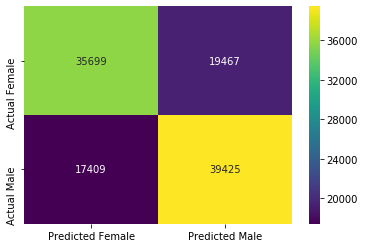

In [55]:
# Visualize our calssification report on a heatmap
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

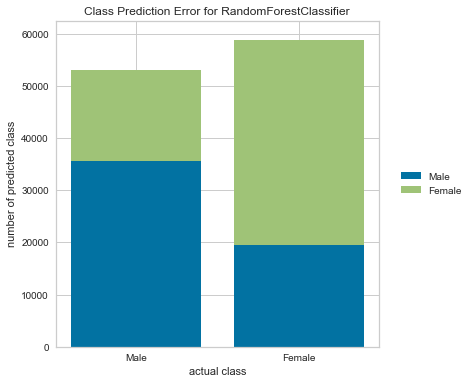

In [57]:
# Visualize our class prediction error using the yellowbrick module
from yellowbrick.classifier import ClassPredictionError

# Classes to be assigned to the model
classes = ['Male', 'Female']

# Encode X_train & X_val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Impute the encoded matrices
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
    classes=classes
)

# Fit to train
visualizer.fit(X_train_imputed, y_train)

# Evaluate model on validation data
visualizer.score(X_val_imputed, y_val)

# Draw visualization
g = visualizer.poof()

In [58]:
# What are our predicted probabilities?
pred_proba = pipeline.predict_proba(X_val)

[0.91 0.32 0.48 ... 0.58 0.5  0.85]


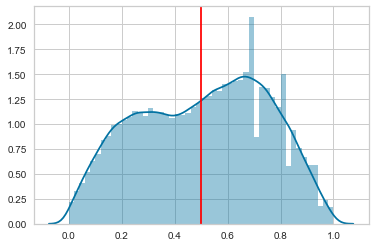

In [59]:
# Check our baseline threshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred_proba = pred_proba[:,1]
print(y_pred_proba)

threshold = 0.50
ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red');

In [60]:
y_pred = y_pred_proba > threshold
pd.Series(y_pred).value_counts()

True     58890
False    53110
dtype: int64

In [62]:
# What percentage get true based on a 0.5 threshold?
58890 / (58890 + 53110)

0.5258035714285715

In [63]:
# Get confusion matrix for majority baseline
majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.5074464285714285

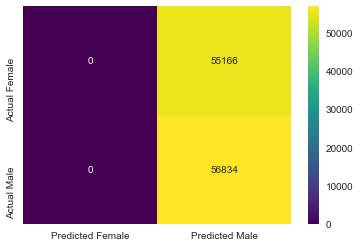

In [64]:
plot_confusion_matrix(y_val, y_pred);

In [66]:
# Get ROCAUC score for our model
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

0.7191619274214253

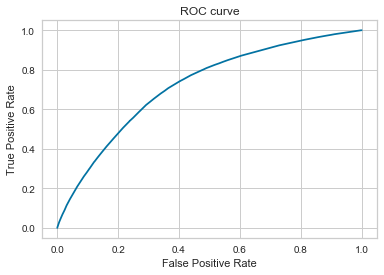

In [68]:
# Plot our model's ROC AUC score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val=='Male', y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [69]:
# Partial Dependence with categorical features


# Create model to train
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit to train
model.fit(X_train_imputed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

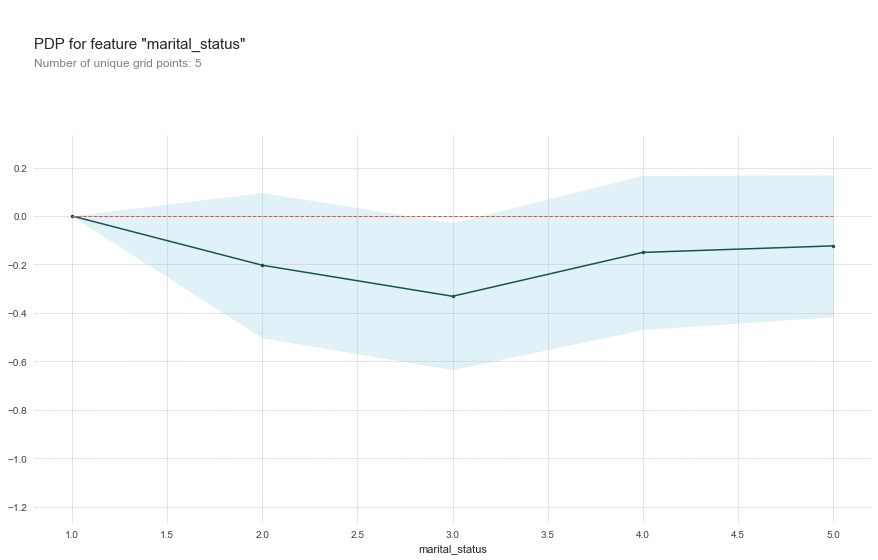

In [70]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'marital_status'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [71]:
# Check encoder mappings
encoder.mapping

[{'col': 'resident_status', 'mapping': RESIDENTS                  1
  INTRASTATE NONRESIDENTS    2
  INTERSTATE NONRESIDENTS    3
  FOREIGN RESIDENTS          4
  NaN                       -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'month_of_death', 'mapping': June          1
  February      2
  May           3
  November      4
  July          5
  August        6
  December      7
  March         8
  April         9
  October      10
  January      11
  September    12
  NaN          -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'detail_age_type', 'mapping': Years      1
  Days       2
  Months     3
  Minutes    4
  Hours      5
  NaN        6
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'infant_age_recode_22',
  'mapping': Age 1 year and over or not stated                        1
  7-13 days (includes not stated weeks)                    2
  2 months                                                 3
  7 months                                                

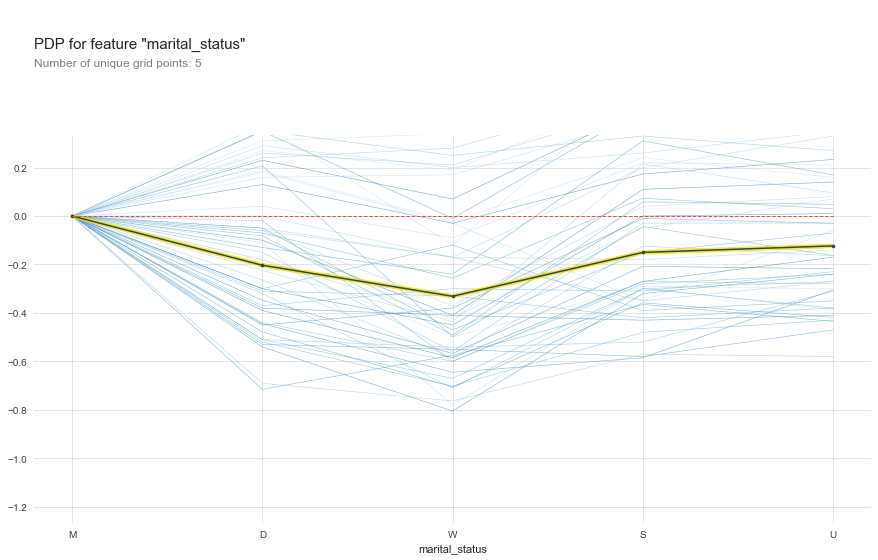

In [72]:
pdp.pdp_plot(pdp_dist, feature, plot_lines=True, frac_to_plot=50)

# Manually change the xticks labels
plt.xticks([1, 2, 3, 4, 5], ['M', 'D', 'W', 'S', 'U']);

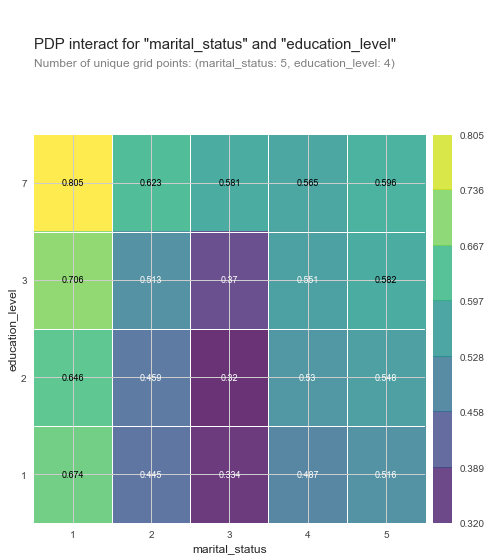

In [74]:
# Look at 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# select features
features = ['marital_status', 'education_level']

interaction = pdp_interact(
    model=model,
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [75]:
# Look at predictions vs actuals
pred_act = pd.DataFrame({
    'y_pred_proba': y_pred_proba, 
    'y_val': y_val
})

pred_act.head()

,y_pred_proba,y_val
76653,0.91,Male
151929,0.32,Female
1170456,0.48,Female
423766,0.21,Female
2075677,0.45,Male


In [76]:
male = pred_act['y_val'] == 'Male'
female = ~male
right = (male) == (pred_act['y_pred_proba'] > 0.5)
wrong = ~right

In [77]:
# Sample male & right
pred_act[male & right].sample(n=10, random_state=42).sort_values(by='y_pred_proba')

,y_pred_proba,y_val
2543491,0.506000,Male
142520,0.557500,Male
2659995,0.600000,Male
1105093,0.600000,Male
2180648,0.620000,Male
1397455,0.680000,Male
235063,0.711667,Male
1676335,0.760000,Male
2569813,0.779500,Male
443612,0.780000,Male


In [78]:
row = X_val.loc[[2543491]]
row

,resident_status,month_of_death,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,130_infant_cause_recode,39_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin
2543491,INTRASTATE NONRESIDENTS,April,Years,55,Age 1 year and over or not stated,"Hospital, clinic or Medical Center",Divorced,Monday,No,Accident,Cremation,No,During unspecified activity,,nan,All other and unspecified accidents and advers...,White,White,White,100,Non - Hispanic white,high school,55 - 64 years


In [80]:
# Explain the above prediction with Shapley value plot
import shap

processor = pipeline[:-1]
row_transformed = processor.transform(row)

explainer = shap.TreeExplainer(pipeline[-1])
row_processed = row_transformed
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row
)